# 202.4. Template coadd

<div>
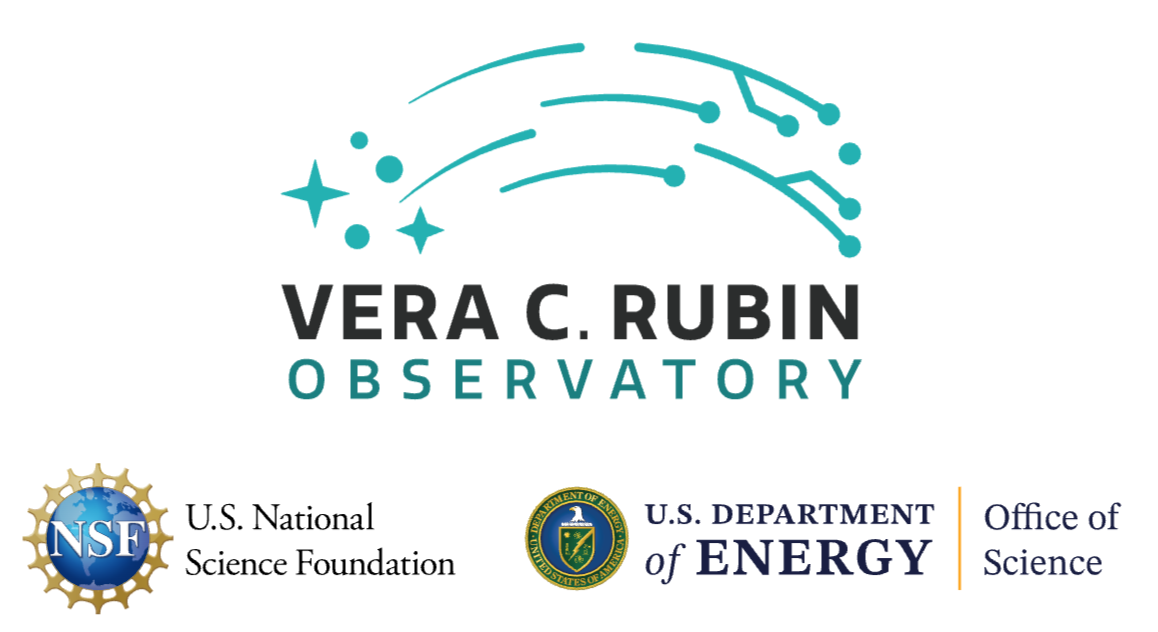
</div>
For the Rubin Science Platform at data.lsst.cloud. <br>
Data Release: <a href="https://dp1.lsst.io/">Data Preview 1</a> <br>
Container Size: large <br>
LSST Science Pipelines version: r29.1.1 <br>
Last verified to run: 2025-06-21 <br>
Repository: <a href="https://github.com/lsst/tutorial-notebooks">github.com/lsst/tutorial-notebooks</a> <br>

**Learning objective:** To understand the format and metadata of a `template_coadd`.

**LSST data products:** `template_coadd`

**Packages:** `lsst.daf.butler`, `lsst.rsp`, `lsst.afw.display`

**Credit:**
Originally developed by the Rubin Community Science team.
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the 
<a href="https://community.lsst.org/c/support">Support Category</a> 
of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

A `template_coadd` is a combination of the third best-seeing processed, calibrated, and background-subtracted visit images, for a patch of sky, for one of the six LSST filters.
These templates are subtracted from the visit images to create difference images, in order to to find time-variable and moving objects.

* butler dataset type: `template_coadd`
* number of images: 2730

**Related tutorials:** The 100-level tutorials on how to use the butler, TAP, SIA, and Firefly demonstrate how to query for and retrieve images, and how to manipulate the Firefly display interface.

### 1.1. Import packages

From the LSST Science Pipelines import the packages for the Butler, 2-dimensional sky geometry, and for image display.
Also import the `numpy` package.

In [ ]:
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.geom
import numpy as np

### 1.2. Define parameters and functions

Instantiate the Butler.

In [ ]:
butler = Butler("dp1", collections="LSSTComCam/DP1")
assert butler is not None

Set `afw_display` to use `Firefly` and open the Firefly display tab.

In [ ]:
afwDisplay.setDefaultBackend('firefly')
afw_display = afwDisplay.Display(frame=1)

## 2. Data access

It is recommended to use the Rubin data `Butler` to retrieve image data within Jupyter Notebooks,
but they are also available via the TAP and SIA services (Table Access Protocol and Simple Image Access).

**Recommended access method:** Butler


### 2.1. Butler

Show that the dimensions for the `template_coadd` dataset type are the band, and the skymap's tract and patch, and that the returned image will be of type `ExposureF`. 
The LSST Science Piplines tools for image manipulation and visualization work best with the `ExposureF` format.
This format includes pixel data and metadata.

In [ ]:
butler.get_dataset_type('template_coadd')

In [ ]:
butler.get_dataset_type('template_coadd').dimensions.required

#### 2.1.1. Demo query

Query for `template_coadd` imges that overlap coordinates RA, Dec near the center of the ECDFS field and were obtained with the r-band filter.

In [ ]:
ra = 53.076
dec = -28.110
band = 'r'
query = f"band.name = '{band}' AND patch.region OVERLAPS POINT({ra}, {dec})"
dataset_refs = butler.query_datasets("template_coadd", where=query)
assert len(dataset_refs) == 2
print(len(dataset_refs))
del ra, dec, band, query

The `template_coadd` images do overlap at their edges, and for
the above query the fact that 2 `template_coadd` images
match the query constraints means that the RA, Dec
coordinates are in the overlap region.

#### 2.1.2. Get an image

The `template_coadd` can be retrieved from the Butler using the
(a) the `dataset_refs`; (b) the `dataId`; or (c) the `tract` and `patch` numbers.

##### (a) Use the dataset reference

For the first dataset reference returned by the query, get the corresponding `template_coadd`.

In [ ]:
ref = dataset_refs[0]
template_coadd = butler.get(ref)

See that it is of type `ExposureF`.

In [ ]:
template_coadd

Display the image in the Firefly window.
Set the mask transparency to 100 (fully transparent, i.e., do not show the mask).

In [ ]:
afw_display.mtv(template_coadd)
afw_display.setMaskTransparency(100)

Clean up.

In [ ]:
del ref

##### (b) Use the dataId

For the first dataset reference returned by the query, get the `dataId`.

In [ ]:
ref = dataset_refs[0]
use_dataId = ref.dataId
use_dataId

Option to use the defined `dataId` to retrieve the corresponding `template_coadd`.

In [ ]:
# template_coadd = butler.get('template_coadd', dataId = use_dataId)

Option to display the `template_coadd`.

In [ ]:
# afw_display.mtv(template_coadd)

Clean up.

In [ ]:
del ref, use_dataId

##### (c) Use the tract, patch, and band

For the first dataset reference returned by the query, get the `dataId` and extract the `band` and the `tract` and `patch` numbers.

In [ ]:
ref = dataset_refs[0]
dataId = ref.dataId
use_band = dataId.get('band')
use_tract = dataId.get('tract')
use_patch = dataId.get('patch')
print(use_band, use_tract, use_patch)

Even if the Butler is not used to *query* for the images (e.g., if the SIA or TAP service is used to find images matching a set of constraints),
images can be retrieved from the Butler by passing the `band`, `tract`, and `patch`.

Option to use the `band`, `tract`, and `patch` to get the corresponding `template_coadd`.

In [ ]:
template_coadd = butler.get('template_coadd', band=use_band,
                            tract=use_tract, patch=use_patch)

Option to display the `template_coadd`.

In [ ]:
# afw_display.mtv(template_coadd)

Clean up (but keep the `template_coadd` and the `dataset_refs` to use below).

In [ ]:
del ref, dataId, use_band, use_tract, use_patch

### 2.2. SIA (Simple Image Access)

The Simple Image Access (SIA) service provides a standardized model for image metadata, and the capability to query and retrieve image datasets.
Use of SIA, and data retrieval via the `access_url` in the SIA results table, is demonstrated in the 100-level tutorials.

To return `template_coadd` images from a SIA query, set:

* `calib_level` = 3
* `dpsubtype` = 'lsst.template_coadd'

See Section 2.1.2. for how to retrieve images via the butler using the `lsst_band`, `lsst_tract`, and `lsst_patch` columns in the SIA results table.

### 2.3. TAP (Table Access Protocol)

The Table Access Protocol (TAP) service provides a standardized model for accessing image metadata and catalog data with the Astronomical Data Query Language (ADQL).
Use of TAP, and data retrieval via the `access_url` in the TAP results table, is demonstrated in the 100-level tutorials.

Image metadata is stored in the `ObsCore` table.

To return `template_coadd` images from a TAP query, set:

* Calibration level 3.
* Dataproduct subtype: `lsst.template_coadd`

See Section 2.1.2. for how to retrieve images via the butler using the `lsst_band`, `lsst_tract`, and `lsst_patch` columns in the SIA results table.

## 3. Pixel data

The `template_coadd` images have three planes: image, variance, and mask.

Use the `template_coadd` retrieved in Section 2.1.2.

Display the `template_coadd` in frame 1, and set the mask transparency to 0 (not transparent; to show the mask).

In [ ]:
afw_display.mtv(template_coadd)
afw_display.setMaskTransparency(0)

With the mask plane fully opaque, it should look like this:

<div>
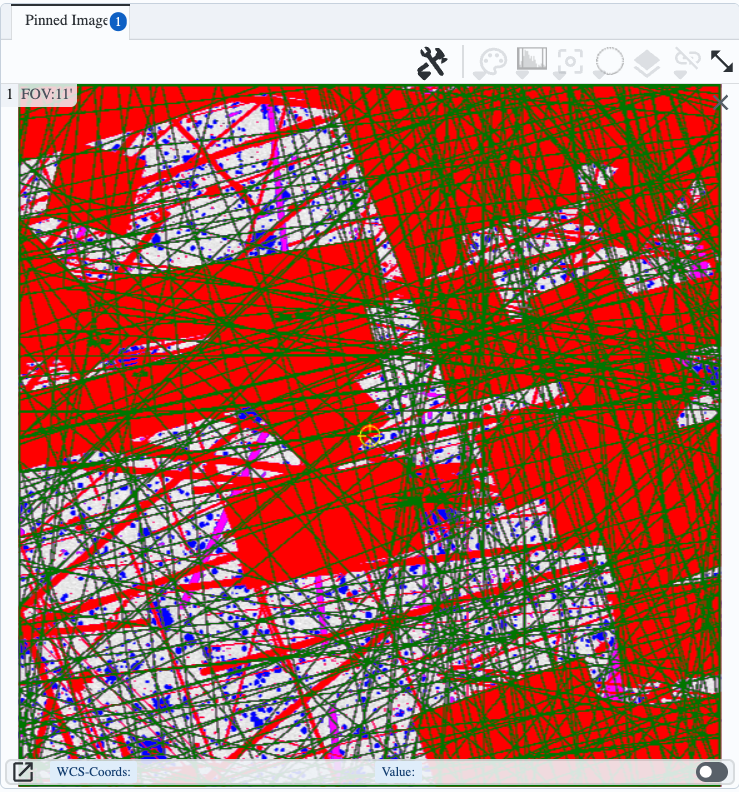
</div>
<br>

> **Figure 1:** The mask plane of the r-band `template_coadd` image for tract 5063, patch 14. The colors correspond to an informative mask flag value (Section 3.3). Almost every pixel has a color (has a nonzero mask value).

### 3.1. Image plane

Sky pixel data in units of nJy (nanoJanskys).

The background has been subtracted so values can be negative.

Extract the `image` data from the `visit_image`, and extract its pixel values as an array.

In [ ]:
image = template_coadd.getImage()
image_array = image.array

Option to show the `image` and the `image_array`.

In [ ]:
# image

In [ ]:
# image_array

Print statistics on the `image_array`.

In [ ]:
print(image_array.min())
print(image_array.mean())
print(image_array.max())

Display the `image` in Firefly frame 2.

In [ ]:
afw_display = afwDisplay.Display(frame=2)
afw_display.mtv(image)

Mouse-over display frame 2.
As the `image` contains only pixel data, the image is displayed without a WCS: the coordinates are in pixels, not RA, Dec (as in frame 1).

### 3.2. Variance plane

Uncertainty (noise) in the sky pixel data in units of nJy^2 (nanoJanskys squared).

Values are always positive.

Extract the `variance` and `variance_array`.

In [ ]:
variance = template_coadd.getVariance()
variance_array = variance.array

Print statistics on the `variance_array`.

In [ ]:
print(variance_array.min())
print(variance_array.mean())
print(variance_array.max())

Display the `variance`.

In [ ]:
afw_display = afwDisplay.Display(frame=3)
afw_display.mtv(variance)

### 4.3. Mask plane

An integer bitmask of representative flag values that indicate processing status or issues, similar to the [SDSS bitmasks](https://www.sdss4.org/dr17/algorithms/bitmasks/).

Extract the `mask`.

In [ ]:
mask = template_coadd.getMask()
mask_array = mask.array

Mask keys (names) are defined by the `mask`
and interpreted as colors by `afw_display`.

Print the list of mask keys and color.

In [ ]:
for mask_key, bit in mask.getMaskPlaneDict().items():
    print('{} ({}): {}'.format(mask_key, bit,
                               afw_display.getMaskPlaneColor(mask_key)))

Display the mask in Firefly frame 4.

In [ ]:
afw_display = afwDisplay.Display(frame=4)
afw_display.mtv(mask)

The colors are different because the Firefly display interprets the pixel values as flux values (mouse-over and see).

Set the mask transparency to opaque to see the same colors as in frame 1.

In [ ]:
afw_display.setMaskTransparency(0)

Set all mask key names to transparent except the "DETECTED" mask bit.

In [ ]:
afw_display.setMaskTransparency(100)
afw_display.setMaskTransparency(0, 'DETECTED')

Option to print a list of the unique mask array values, the number of pixels with that value, and the overlapping masks for pixels with that value.

In [ ]:
# values, counts = np.unique(mask_array, return_counts=True)
# for value, count in zip(values, counts):
#     print(value, '('+str(count)+')', mask.interpret(value))
# del values, counts

Clean up.

In [ ]:
del image, image_array, variance, variance_array, mask, mask_array

## 4. Metadata and attributes

### 4.1. Header

The informational equivalent of a FITS image header is the `metadata`.

Get the `template_coadd` `metadata`.

In [ ]:
metadata = template_coadd.getMetadata()

Option to display the metadata.

In [ ]:
# metadata

Convert the metadata to a python dictionary.

In [ ]:
md_dict = metadata.toDict()

Show any metadata key that contains the string "UNIT".

In [ ]:
for key in md_dict.keys():
    if key.find('UNIT') >= 0:
        print(key)

Print the "BUNIT" from the dictionary (the flux units).

In [ ]:
md_dict['BUNIT']

Clean up.

In [ ]:
del metadata, md_dict

### 4.2. Information

Information about the `template_coadd`.

Get the info.

In [ ]:
info = template_coadd.getInfo()

Get the list of input images that were combined to generate
the `template_coadd`.

In [ ]:
inputs = info.getCoaddInputs()

Extract the lists of visits and detectors (ccds)
as `astropy` tables, with the option to display the tables.

In [ ]:
visits = inputs.visits.asAstropy()
print(len(visits))
# visits

In [ ]:
ccds = inputs.ccds.asAstropy()
print(len(ccds))
# ccds

In [ ]:
del info, inputs, visits, ccds

### 4.3. World Coordinate System (WCS)

The reference system that maps pixel coordinate (x, y) to sky coordinate (RA, Dec).

Get the WCS and show it.

In [ ]:
wcs = template_coadd.getWcs()
wcs

Convert pixel coordinates to sky coordinates, and vice versa.

In [ ]:
coord = lsst.geom.SpherePoint(53.13*lsst.geom.degrees, -28.10*lsst.geom.degrees)
xy = wcs.skyToPixel(coord)

In [ ]:
print(xy)

In [ ]:
xy2 = lsst.geom.Point2D(13000, 4000)
coord2 = wcs.pixelToSky(xy2)

In [ ]:
print(coord2)

In [ ]:
del xy, xy2, coord, coord2

### 4.4. Bounding box (corners)

The bounding box defines the extent (corners) of the image.

Get the bounding box.

In [ ]:
bbox = template_coadd.getBBox()

In [ ]:
bbox

Print the `template_coadd` corners in pixels and sky coordinates.

In [ ]:
corners = (lsst.geom.Point2D(bbox.beginX, bbox.beginY),
           lsst.geom.Point2D(bbox.beginX, bbox.endY),
           lsst.geom.Point2D(bbox.endX, bbox.endY),
           lsst.geom.Point2D(bbox.endX, bbox.beginY))
for corner in corners:
    print(corner, wcs.pixelToSky(corner))

Print the area of the bounding box.

In [ ]:
print(bbox.area, 'square pixels')
scale = wcs.getPixelScale().asArcminutes()
area = bbox.area * scale**2
print(np.round(area, 2), 'square arcminutes')

Check if pixel values are within the bounding box.

In [ ]:
assert bbox.contains(100, 100) is False
print(bbox.contains(100, 100))
assert bbox.contains(12000, 4000) is True
print(bbox.contains(12000, 4000))

Check if sky coordinates are within the bounding box.

In [ ]:
coord = lsst.geom.SpherePoint(63.0*lsst.geom.degrees, -38.0*lsst.geom.degrees)
xy = wcs.skyToPixel(coord)
assert bbox.contains(xy.getX(), xy.getY()) is False
print(bbox.contains(xy.getX(), xy.getY()))

Clean up.

In [ ]:
del wcs, bbox, corners, scale, area, coord, xy

### 4.5. Point spread function (PSF)

The PSF is the empirical estimate of the shape of a point source as a function of position in the image. The PSF encapsulates all of the atmospheric and optical effects that blur point sources into their measured shapes.

Get the PSF.

In [ ]:
psf = template_coadd.getPsf()

At pixel coordinates x, y = 12000, 4000, compute the PSF and display it in frame 5.

In [ ]:
xy = lsst.geom.Point2D(12000, 4000)
psf_image = psf.computeImage(xy)
afw_display = afwDisplay.Display(frame=5)
afw_display.mtv(psf_image.convertF())

Compute the shape of the PSF.
Print the size in $\sigma$ and in FWHM (full-width at half-max),
and the second moments (all units are pixels).

In [ ]:
psf_shape = psf.computeShape(xy)
psf_sigma = psf_shape.getDeterminantRadius()
psf_fwhm = psf_sigma * 2.0*np.sqrt(2.0*np.log(2.0))
print(f"PSF sigma: {psf_sigma}, PSF FWHM: {psf_fwhm}")
print("PSF shape (ixx, iyy, ixy): ",psf_shape.getIxx(), psf_shape.getIyy(), psf_shape.getIxy())

Clean up.

In [ ]:
del psf, xy, psf_image, psf_shape, psf_sigma, psf_fwhm